# Decitabine and rg3039 treatment RNA-Seq experiments
Decitabine -> DNMT1 inhibitor 

rg3039 -> DCPS inhibitor

In [1]:
from venn import venn 
import sys
import pandas as pd 
from matplotlib.pyplot import subplots
from itertools import chain, product
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt

sys.path.append('../../scripts/')

from util import *

In [97]:
comb_vs_decitabine_up,comb_vs_decitabine_down = [
    set(c.index.tolist()) for c in find_top(
        pd.read_csv('comb_vs_decitabine_delta_exp_table.txt',sep='\t').set_index('gene_name')[['log2FoldChange','pvalue']],'log2FoldChange',5,'pvalue',0.01
    )]

comb_vs_dmso_up,comb_vs_dmso_down = [
    set(c.index.tolist()) for c in find_top(
        pd.read_csv('comb_vs_dmso_delta_exp_table.txt',sep='\t').set_index('gene_name')[['log2FoldChange','pvalue']],'log2FoldChange',5,'pvalue',0.01
    )]

up:  34
down: 25
up:  185
down: 31


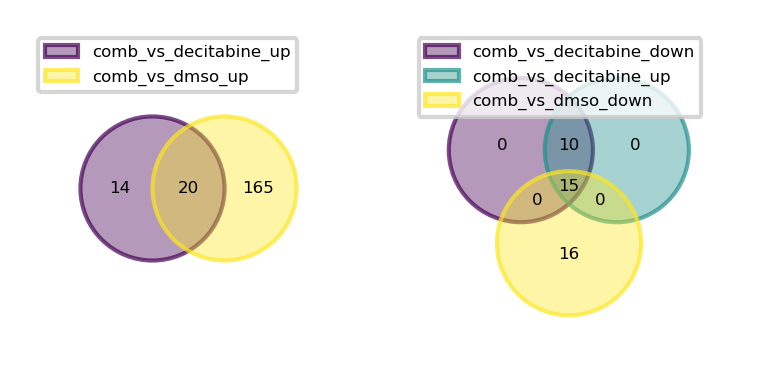

In [103]:
_, (ax,bx) = subplots(ncols=2, nrows=1, figsize=(3, 3),dpi=300)

venn(
    {'comb_vs_decitabine_up':comb_vs_decitabine_up,
     'comb_vs_dmso_up':comb_vs_dmso_up},
     fontsize=4,legend_loc="upper left", 
    ax=ax
)
venn(
    {'comb_vs_decitabine_down':comb_vs_decitabine_down,
     'comb_vs_decitabine_up':comb_vs_decitabine_down,
     'comb_vs_dmso_down':comb_vs_dmso_down},
     fontsize=4,legend_loc="upper left", ax=bx
)

plt.show()

In [101]:
len(list(comb_vs_decitabine_up - comb_vs_dmso_up))

14

In [99]:
genes = list(comb_vs_decitabine_up - comb_vs_dmso_up) + list(comb_vs_decitabine_down - comb_vs_dmso_down)

In [100]:
genes

['NPM1P21',
 'OCSTAMP',
 'AC007272.1',
 'SNORA81',
 'SPOCK1',
 'AL355512.1',
 'LINC00674',
 'MREG',
 'FP236383.6',
 'ACSBG1',
 'AC104452.1',
 'AC004908.3',
 'PPP1R13B',
 'SNX29P1',
 'AL359715.1',
 'RN7SL255P',
 'STEAP1',
 'PROX1-AS1',
 'AL139260.3',
 'AL590226.1',
 'ZIC2',
 'CHIT1',
 'AC078899.4',
 'AC137932.1']

## Load packages and functions

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R 
suppressMessages(suppressWarnings(library (tidyverse)))
suppressMessages(suppressWarnings(library (ggplot2)))
suppressMessages(suppressWarnings(library (ggrepel)))
suppressMessages(suppressWarnings(library (patchwork)))
suppressMessages(suppressWarnings(library(gridExtra)))
library(grid)
library(ggthemes)

In [3]:
%%R 
ncu = read.table(
    'deseq2_norm.txt', sep="\t"
)

In [4]:
%%R 
result_table <- cbind(
    read.table('comb_vs_decitabine_delta_exp_table.txt',header=T) %>% 
        dplyr::select('gene_name','log2FoldChange','pvalue') %>% rename(comb_vs_dmso_log2FC=log2FoldChange,comb_vs_dmso_pvalue=pvalue),
    read.table('comb_vs_dmso_delta_exp_table.txt',header=T) %>% 
        dplyr::select('log2FoldChange','pvalue') %>% rename(comb_vs_decitabine_log2FC=log2FoldChange,comb_vs_decitabine_pvalue=pvalue)
) %>% drop_na() %>% dplyr::filter(
    (#abs(comb_vs_dmso_log2FC) > 2 & 
    comb_vs_dmso_pvalue < 0.01) | 
    (#abs(comb_vs_decitabine_log2FC) > 2 & 
    comb_vs_decitabine_pvalue < 0.01)
)

### Scatter plot

In [5]:
# RES$comb_vs_dmso$log2FoldChange
# RES$comb_vs_dmso$log2FoldChange

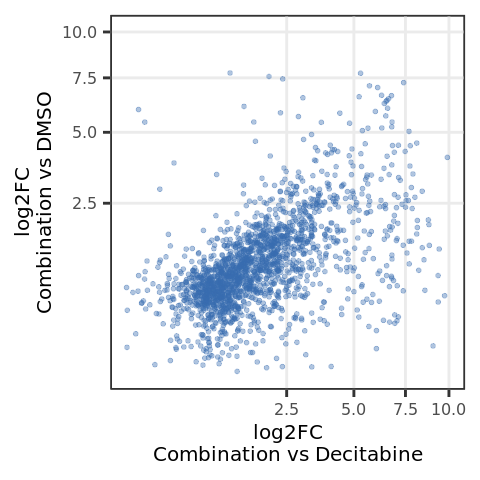

In [29]:
%%R 
# -i genes

# genes = genes %>% unlist
# genes = genes[1:5]
# genes = c('SQLE')
x_lab = 'comb_vs_decitabine_log2FC' 
y_lab = 'comb_vs_dmso_log2FC'

# s <- cor.test(result_table[, x_lab], result_table[, y_lab], method = "pearson")
# pv = ifelse(s$p.value == 0, -log(2.2e-16, base = 10), -log(s$p.value, base = 10))
# ann <- sprintf("Rho = %.3g\n-log10(P) = %.4g", s$estimate, pv)

p <- result_table %>% ggplot + 
    aes(comb_vs_decitabine_log2FC, comb_vs_dmso_log2FC,label=gene_name) + 
    # "#fdb462", "#7fc97f
    geom_point(colour='#386cb0',size = 2, alpha = 0.4, show.legend = FALSE) + 
    # geom_smooth(method = lm, level = 0.9, alpha = 0.1, size = 2, se = T,colour='gray30',linetype="dashed") + 
    # annotate("text", x = -5, y = 5, label = ann, size = 5) +
    xlab('log2FC\nCombination vs Decitabine') + 
    ylab('log2FC\nCombination vs DMSO') + 
    scale_y_sqrt(limits=c(-10,10)) + 
    scale_x_sqrt(limits=c(-10,10)) + 
    labs(colour = "") + 
    theme_bw(30) +
    theme(
        text=element_text(size=20),
        panel.background = element_rect(colour = "black"), panel.grid.minor = element_blank())

ggsave('scatter_plot_comb_decitabine_dmso.pdf',plot=p, width = 7, height = 7)

p

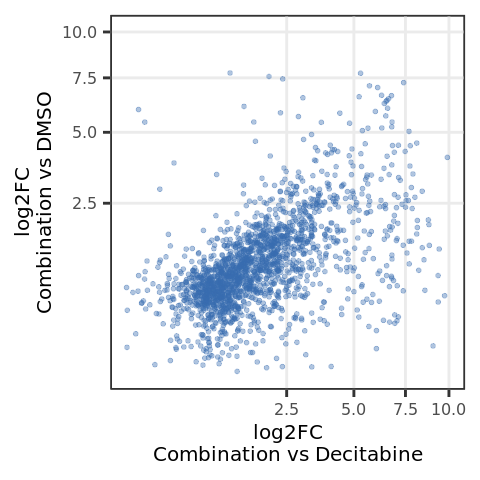

In [26]:
%%R
p + 
  geom_text_repel(
    data          = result_table %>% dplyr::filter(gene_name %in% c('BCL2')),
    nudge_y       = 36 ,#- subset(dat, mpg > 30)$mpg,
    segment.size  = 2,
    segment.color = "grey50",
    direction     = "x"
  )

## Clustering 

In [12]:
%%R 
library(RColorBrewer)
library(pheatmap)

heat_colors <- brewer.pal(n = 6, name = "RdYlBu") %>% rev
paired <- brewer.pal(n = 10, name = "Paired")

In [13]:
%%R 
result_table %>% colnames

[1] "gene_name"                 "comb_vs_dmso_log2FC"      
[3] "comb_vs_dmso_pvalue"       "comb_vs_decitabine_log2FC"
[5] "comb_vs_decitabine_pvalue"


In [14]:
%%R 
ann_colors = list(
    cond = c('DMSO'= paired[1], 'Decitabine'=paired[3], 'rg3039'=paired[9],'Combination'=paired[10])
)

# meta 
conds  <- factor(c(
    rep('Combination',2),rep('Decitabine',2),rep('DMSO',2),rep('rg3039',2)
), levels = c('DMSO','Decitabine','rg3039','Combination'))

reps <- factor(c(
    rep(c('rep1','rep2'),4)
),c('rep1','rep2'))

colData <- data.frame(
    cond=conds,
    reps=reps,
    row.names=ncu %>% dplyr::select(-name) %>% colnames,
    stringsAsFactors=T
)
colData

                          cond reps
hl60_combination_1 Combination rep1
hl60_combination_2 Combination rep2
hl60_decitabine_1   Decitabine rep1
hl60_decitabine_2   Decitabine rep2
hl60_dmso_1               DMSO rep1
hl60_dmso_2               DMSO rep2
hl60_rg3039_1           rg3039 rep1
hl60_rg3039_2           rg3039 rep2


In [ ]:
%%R 
ncu %>% dplyr::filter(name %in% genes) %>% dplyr::select(-name) %>% head

In [ ]:
%%R -i genes

genes = genes %>% unlist

ncu[
    ncu$name %in% genes,
    colData %>% rownames
] %>% 
    # generate heatmap
    pheatmap(
        color = heat_colors, 
        show_colnames = T,
        show_rownames = F,
        cutree_rows = 4,
        main = 'Decitabine and rg3039 drug combination\nRNA expression of HL-60 cell line',
        # annotation = colData %>% arrange(cond) %>% select(cond),
        cluster_cols = T, 
        scale = 'row',
        angle_col= 45,
        annotation_colors = ann_colors
) -> hm

# # # https://stackoverflow.com/questions/43051525/how-to-draw-pheatmap-plot-to-screen-and-also-save-to-file
# # # pdf('heatmap_clustering.pdf', width=4, height=4)
# # # grid::grid.newpage()
# # # grid::grid.draw(hm$gtable)
# # # dev.off()

# Session Info

In [87]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] MASS_7.3-54                 ggthemes_4.2.4             
 [3] gridExtra_2.3               BiocParallel_1.28.0        
 [5] patchwork_1.1.1             DESeq2_1.34.0              
 [7] SummarizedExperiment_1.24.0 MatrixGenerics_1.6.0       
 [9] matrixStats_0.61.

In [88]:
date()

[1] "Tue Oct  4 16:10:36 2022"